# Seminar 1. Machine learning on Titanic data

The notebook provides an intro to the exploratory analysis of the data, data preprocessing and application of machine learning methods.

The notebook is based on kaggle kernel "Titanic: Machine Learning from Disaster"  https://www.kaggle.com/omarelgabry/a-journey-through-titanic by Omar El Gabry.
Data is from a toy competition on kaggle named Titanic.
The goal of the competition is to predict who survived and who died during the sinking of the RMS Titanic.

### Documentation to go through:

* https://docs.python.org/3/
* https://pandas.pydata.org/docs
* https://matplotlib.org/contents.html
* https://docs.scipy.org/doc/
* http://scikit-learn.org/stable/documentation.html

### Some additional info:


* http://www.scipy-lectures.org/
* https://www.kaggle.com/
* https://pydata.org/

In [7]:
# importing data processing tools: pandas and numpy
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Load data

In [8]:
# get titanic files as a DataFrame
titanic_dataframe = pd.read_csv("https://raw.githubusercontent.com/adasegroup/ML2025_seminars/master/Seminar_01/titanic/train.csv", index_col='PassengerId')

# Look through the data

In [9]:
# preview the data
titanic_dataframe.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# list the features
print(titanic_dataframe.keys())

In [11]:
# column selection by name
titanic_dataframe['Age']

,Age
PassengerId,
1,22.0
2,38.0
3,26.0
4,35.0
5,35.0
...,...
887,27.0
888,19.0
889,NaN


In [12]:
# row selection by id
titanic_dataframe.loc[1]

,1
Survived,0
Pclass,3
Name,"Braund, Mr. Owen Harris"
Sex,male
Age,22.0
SibSp,1
Parch,0
Ticket,A/5 21171
Fare,7.25
Cabin,NaN


In [13]:
# column selection by index
titanic_dataframe.iloc[:, 0]

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0
...,...
887,0
888,1
889,0


In [14]:
# row selection by index
titanic_dataframe.iloc[0, :]

,1
Survived,0
Pclass,3
Name,"Braund, Mr. Owen Harris"
Sex,male
Age,22.0
SibSp,1
Parch,0
Ticket,A/5 21171
Fare,7.25
Cabin,NaN


### Hints and tips

You can use ```%time``` or ```tqdm``` to track the code timing.

Note that ```pandas``` is column oriented data structure.


In [15]:
%time titanic_dataframe['Fare'].mean()

CPU times: user 672 µs, sys: 0 ns, total: 672 µs
Wall time: 688 µs


32.204207968574636

In [16]:
data_titanic_transpose = titanic_dataframe.T
%time data_titanic_transpose.loc['Fare'].mean()

CPU times: user 658 µs, sys: 0 ns, total: 658 µs
Wall time: 669 µs


32.2042079685746

In [17]:
from tqdm import tqdm
for i in tqdm(range(100000000)):
    pass

100%|██████████| 100000000/100000000 [00:20<00:00, 4980311.80it/s]


## Data Dictionary

| Variable | Definition | Key |
| ------------- |:-------------|: -----|
| survival | Survival   | 0 = No, 1 = Yes |
| pclass   | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex | |
| Age | Age in years | |
| sibsp | # of siblings / spouses aboard the Titanic | |
| parch | # of parents / children aboard the Titanic | |
| ticket | Ticket number  | |
| fare   | Passenger fare | |
| cabin  | Cabin number | |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

In [18]:
titanic_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 115.8+ KB


In [19]:
titanic_dataframe.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Hints and tips

Write ```?``` after the function you are interested in or just press ``` Shift + Tab```  for the function short referense.

Double ``` Shift + Tab``` will expand to the full reference.

In [20]:
# call information for the function
titanic_dataframe.drop?

In [21]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
titanic_dataframe.drop(['Name','Ticket'], axis=1, inplace=True)
titanic_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 101.9+ KB


In [22]:
for column_name in titanic_dataframe.columns:
    print(column_name, 'null', titanic_dataframe[column_name].isnull().sum())

# It has a lot of NaN values, so it won't cause a remarkable impact on prediction
titanic_dataframe.drop("Cabin", axis=1, inplace=True)

Survived null 0
Pclass null 0
Sex null 0
Age null 177
SibSp null 0
Parch null 0
Fare null 0
Cabin null 687
Embarked null 2


In [23]:
# Count various embarked values
print(titanic_dataframe["Embarked"].value_counts())

# Fill the two missing values with the most occurred value, which is "S".
titanic_dataframe["Embarked"] = titanic_dataframe["Embarked"].fillna("S")
print(titanic_dataframe["Embarked"].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [24]:
# Groupby
titanic_dataframe.groupby("Survived").count()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,,,,,,,
0,549,549,424,549,549,549,549
1,342,342,290,342,342,342,342


### Tasks:

1. What is the mean value and stds of ages for every passenger class?
2. In what port of embarked the absolute difference between the amount men and women was the greatest?
3. What is a number of NaN values in every column?
4. Replace NaN values in age with median value and calculate the std value.

##### task 1

In [25]:
titanic_dataframe[["Pclass", "Age"]].groupby("Pclass").mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [26]:
titanic_dataframe[["Pclass", "Age"]].groupby("Pclass").std()

,Age
Pclass,
1,14.802856
2,14.001077
3,12.495398


#### task 2

In [27]:
titanic_dataframe.groupby(["Embarked", "Sex"]).count()

Survived  Pclass  Age  SibSp  Parch  Fare
Embarked Sex                                              
C        female        73      73   61     73     73    73
         male          95      95   69     95     95    95
Q        female        36      36   12     36     36    36
         male          41      41   16     41     41    41
S        female       205     205  188    205    205   205
         male         441     441  368    441    441   441

#### task 3

In [28]:
len(titanic_dataframe) - titanic_dataframe.count()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,0


#### task 4

In [29]:
median_age = titanic_dataframe["Age"].median()

In [30]:
median_age

28.0

In [31]:
titanic_dataframe["Age"] = titanic_dataframe["Age"].fillna(median_age)

In [32]:
titanic_dataframe.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Plotting

In [33]:
# visualization tools: matplotlib, seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Text(0, 0.5, 'Fare')

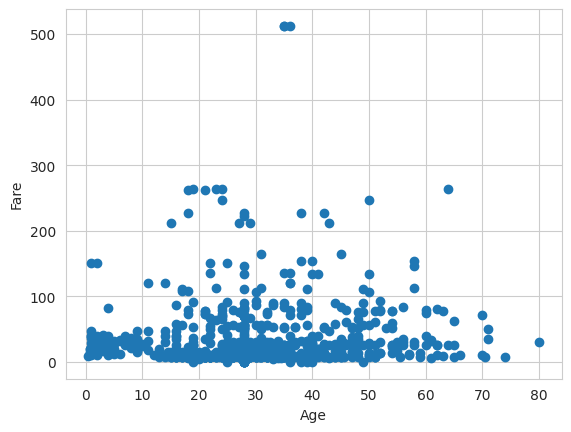

In [34]:
# Simple plot
x = titanic_dataframe['Age']
y = titanic_dataframe['Fare']
plt.plot(x, y, 'o')
plt.xlabel('Age')
plt.ylabel('Fare')

## Categorial variables

In [35]:
# Catplot plot represents share (with unceartainty) of survived passengers for different embarkment ports
sns.catplot?

<Axes: xlabel='Embarked', ylabel='Survived'>

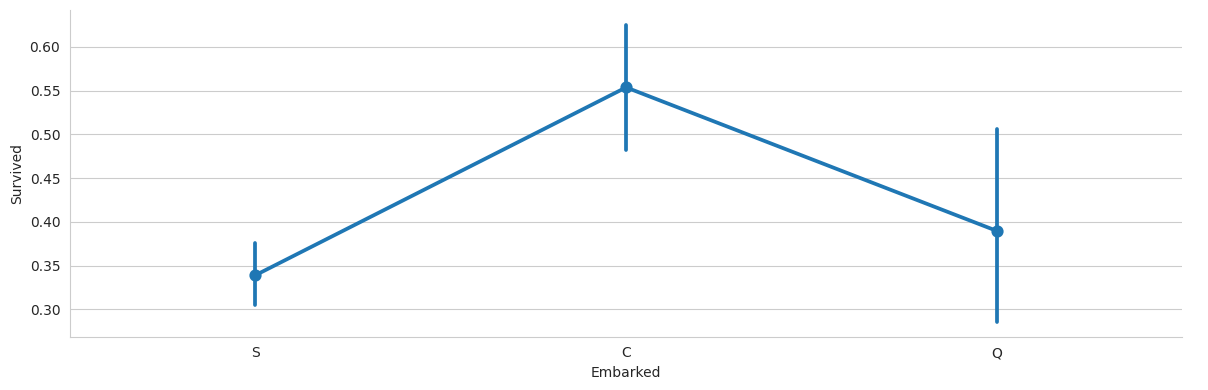

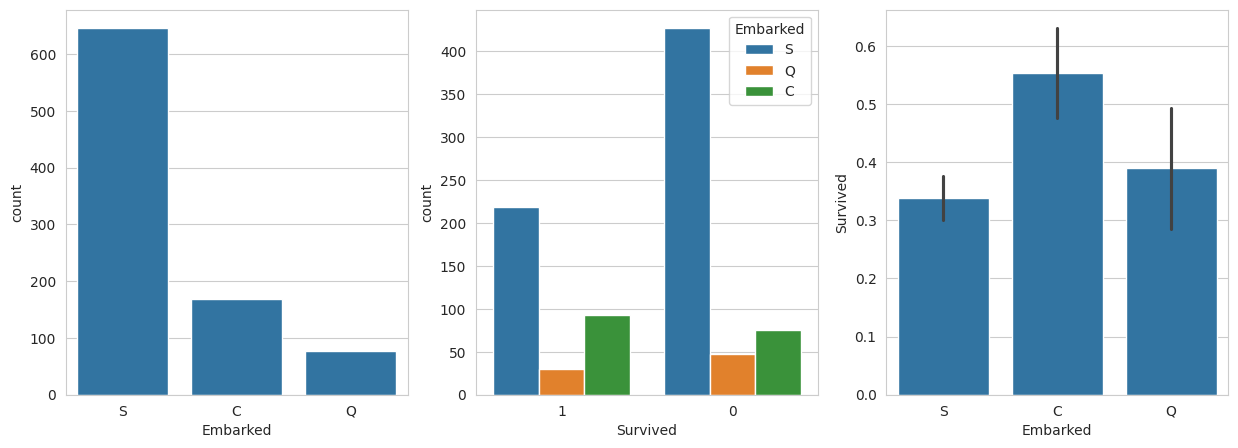

In [36]:
sns.catplot(x = 'Embarked', y = 'Survived', data=titanic_dataframe, height=4, aspect=3, kind = 'point')

figure_handle, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(x='Embarked', data=titanic_dataframe, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=titanic_dataframe, order=[1, 0], ax=axis2)

# group by embarked, and get the mean for survived passengers for each value in Embarked
sns.barplot(x='Embarked', y='Survived', data=titanic_dataframe[["Embarked", "Survived"]], order=['S','C','Q'], ax=axis3)

In [37]:
# consider Embarked column in predictions,
# and remove "S" dummy variable,
# and leave "C" & "Q", since they seem to have a good rate for Survival.

# OR, don't create dummy variables for Embarked column, just drop it,
# because logically, Embarked doesn't seem to be useful in prediction.

embark_dummies_titanic  = pd.get_dummies(titanic_dataframe['Embarked'])

In [38]:
embark_dummies_titanic

,C,Q,S
PassengerId,,,
1,False,False,True
2,True,False,False
3,False,False,True
4,False,False,True
5,False,False,True
...,...,...,...
887,False,False,True
888,False,False,True
889,False,False,True


In [39]:
embark_dummies_titanic.drop(['S'], axis=1, inplace=True)

titanic_dataframe = titanic_dataframe.join(embark_dummies_titanic)

titanic_dataframe.drop(['Embarked'], axis=1, inplace=True)

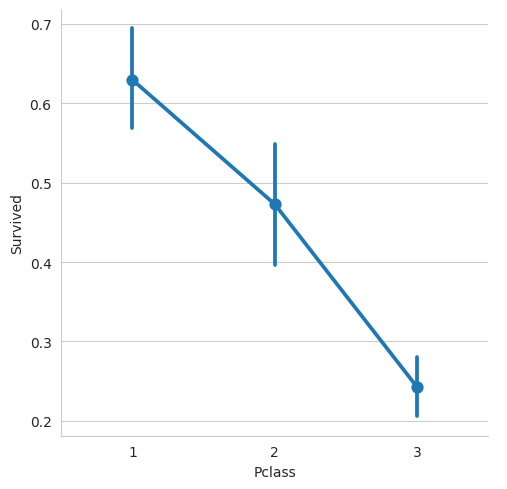

In [40]:
# Pclass
sns.catplot(x = 'Pclass', y = 'Survived', order=[1, 2, 3], data=titanic_dataframe, height=5, kind = 'point')

In [41]:
# The goal is to create dummy variables for class and joint it to the initial dataframe
# create dummy variables for Pclass column, & drop 3rd class as it has the lowest average of survived passengers
pclass_dummies_titanic  = pd.get_dummies(titanic_dataframe['Pclass'])
pclass_dummies_titanic.columns = ['Class_1', 'Class_2', 'Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

titanic_dataframe = titanic_dataframe.join(pclass_dummies_titanic)

<Axes: xlabel='Survived'>

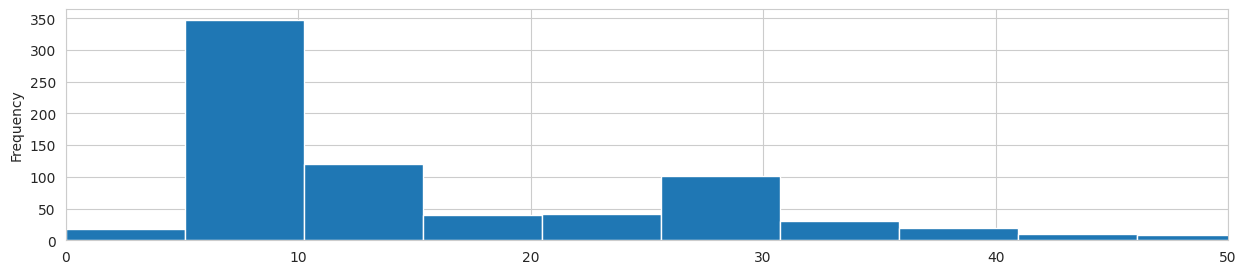

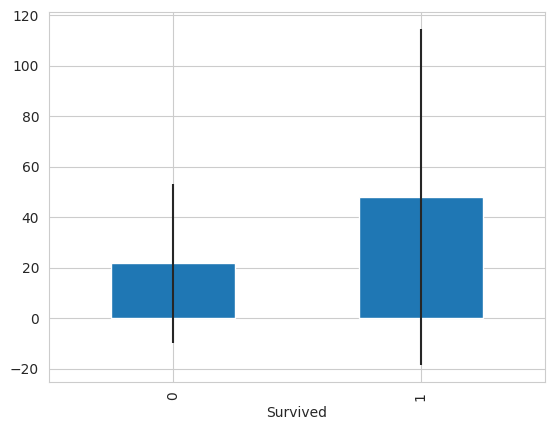

In [42]:
# Examine fare variable

# convert from float to int
titanic_dataframe['Fare'] = titanic_dataframe['Fare'].astype(int)

# get fare for survived & didn't survive passengers
fare_not_survived = titanic_dataframe["Fare"][titanic_dataframe["Survived"] == 0]
fare_survived = titanic_dataframe["Fare"][titanic_dataframe["Survived"] == 1]

# get average and std for fare of survived/not survived passengers
avgerage_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare = DataFrame([fare_not_survived.std(), fare_survived.std()])

# plot
titanic_dataframe['Fare'].plot(kind='hist', figsize=(15, 3), bins=100, xlim=(0, 50))

std_fare.index.names = ["Survived"]
avgerage_fare.index.names = ["Survived"]
avgerage_fare.plot(yerr=std_fare, kind='bar', legend=False)

<Axes: title={'center': 'New Age values - Titanic'}>

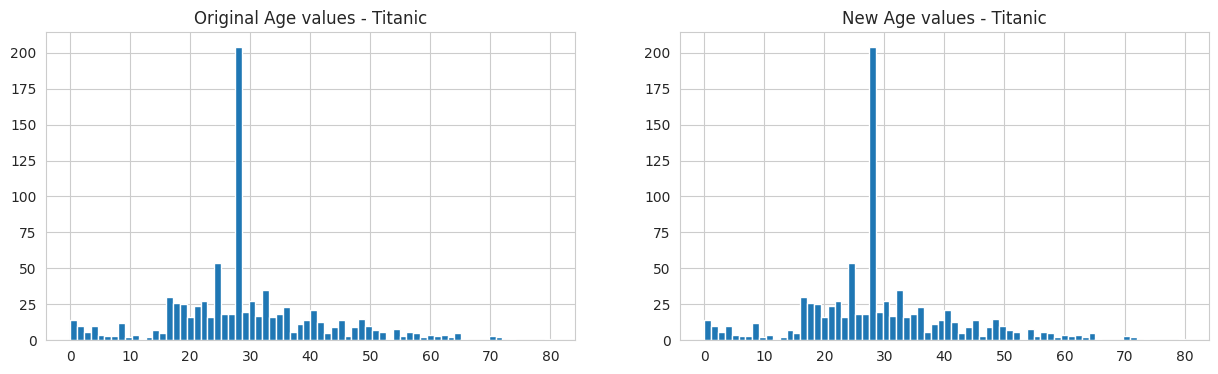

In [43]:
# Age
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

# get average, std, and number of NaN values in titanic_df
average_age_titanic = titanic_dataframe["Age"].mean()
std_age_titanic = titanic_dataframe["Age"].std()
count_nan_age_titanic = titanic_dataframe["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
random_ages = np.random.randint(average_age_titanic - std_age_titanic,
                                average_age_titanic + std_age_titanic,
                                size=count_nan_age_titanic)

# plot original Age values
# NOTE: drop all null values, and convert to int
titanic_dataframe['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# fill NaN values in Age column with random values generated
titanic_dataframe.loc[np.isnan(titanic_dataframe["Age"]), "Age"] = random_ages

# convert from float to int
titanic_dataframe['Age'] = titanic_dataframe['Age'].astype(int)

# plot new Age Values
titanic_dataframe['Age'].hist(bins=70, ax=axis2)

<Axes: xlabel='Age', ylabel='Survived'>

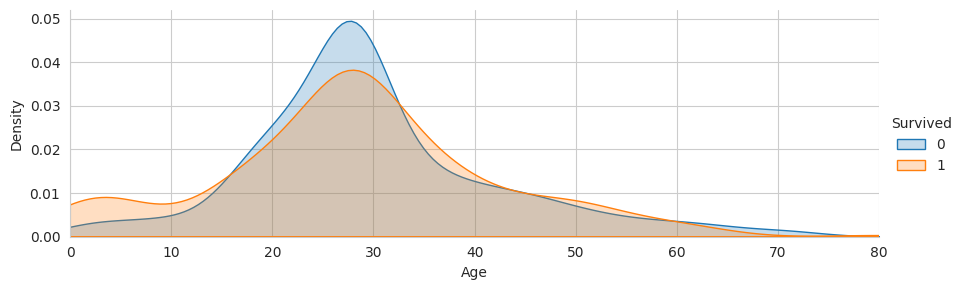

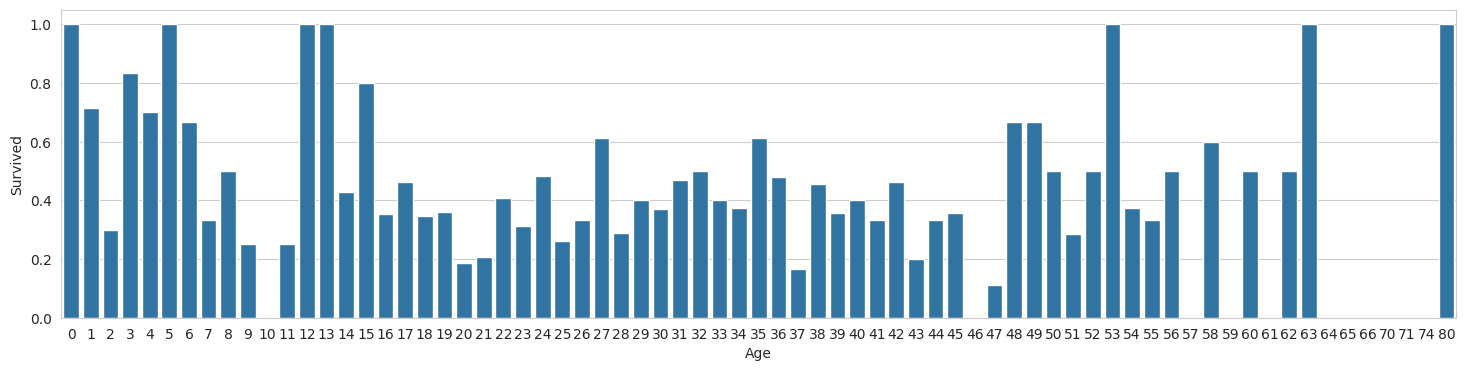

In [62]:
# .... continue with plotting of Age column

# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(titanic_dataframe, hue="Survived", aspect=3)
facet.map(sns.kdeplot, 'Age', fill=True)
facet.set(xlim=(0, titanic_dataframe['Age'].max()))
facet.add_legend()

# average survived passengers by age
figure_handle, axis1 = plt.subplots(1, 1, figsize=(18, 4))
average_age = titanic_dataframe[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

In [45]:
# Instead of having two columns Parch & SibSp,
# we can have only one column that represents if a passenger had any family member aboard or not,
# Meaning, if having any family member (whether parent, brother, ...etc) increases chances of Survival or not.
titanic_dataframe['Family'] = titanic_dataframe["Parch"] + titanic_dataframe["SibSp"]
titanic_dataframe.loc[titanic_dataframe['Family'] > 0, 'Family'] = 1
titanic_dataframe.loc[titanic_dataframe['Family'] == 0, 'Family'] = 0

# drop Parch & SibSp
titanic_dataframe.drop(['SibSp','Parch'], axis=1, inplace=True)

<ipython-input-46-49f51f3032d2>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis1.set_xticklabels(["With Family", "Alone"], rotation=0)


<Axes: xlabel='Family', ylabel='Survived'>

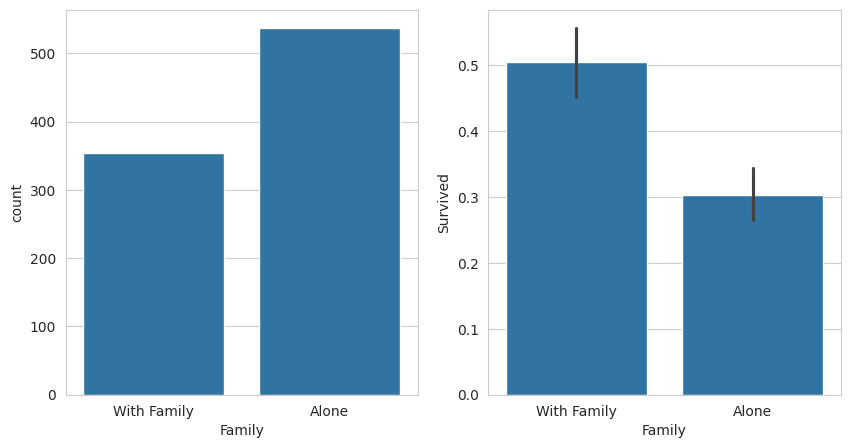

In [46]:
# plot Family
figure_handle, (axis1, axis2) = plt.subplots(1, 2, sharex=True, figsize=(10, 5))

sns.countplot(x='Family', data=titanic_dataframe, order=[1, 0], ax=axis1)
axis1.set_xticklabels(["With Family", "Alone"], rotation=0)

# average of survived for those who had/didn't have any family member
sns.barplot(x='Family', y='Survived', data=titanic_dataframe[["Family", "Survived"]], order=[1, 0], ax=axis2)

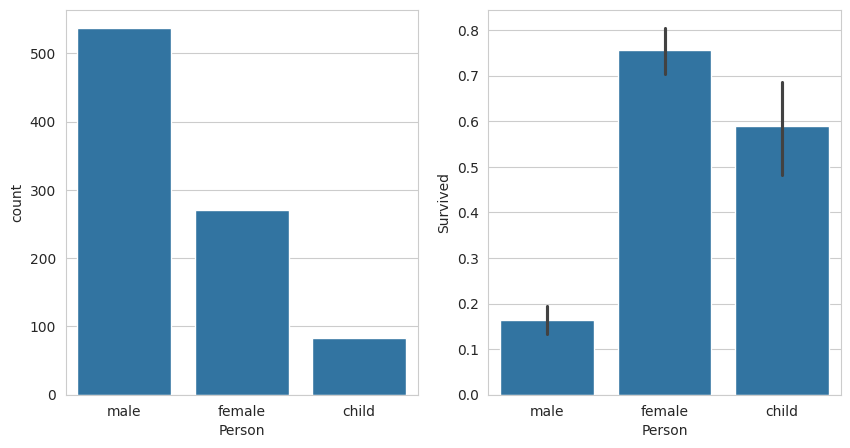

In [47]:
# Sex variable

# As we see, children(age < ~16) on aboard seem to have a high chances for Survival.
# So, we can classify passengers as males, females, and child
def get_person(passenger):
    age, sex = passenger
    return 'child' if age < 16 else sex

titanic_dataframe['Person'] = titanic_dataframe[['Age','Sex']].apply(get_person, axis=1)

# No need to use Sex column since we created Person column
#titanic_dataframe.drop(['Sex'], axis=1, inplace=True)

# create dummy variables for Person column, & drop Male as it has the lowest average of survived passengers
person_dummies_titanic = pd.get_dummies(titanic_dataframe['Person'])
person_dummies_titanic.columns = ['Child', 'Female', 'Male']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

titanic_dataframe = titanic_dataframe.join(person_dummies_titanic)

figure_handle, (axis1, axis2) = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(x='Person', data=titanic_dataframe, ax=axis1)

# average of survived for each Person(male, female, or child)
sns.barplot(x='Person', y='Survived', data=titanic_dataframe[["Person", "Survived"]],
            ax=axis2, order=['male', 'female', 'child'])

# we don't need person variable after introduction of the corresponding dummy variables
titanic_dataframe.drop(['Person'], axis=1, inplace=True)

### Task

1. Is distribution of age similar for men and women?
2. Compare Age distribution for all three classes.

#### task 1

<Axes: title={'center': 'Age histogram - Titanic, female'}>

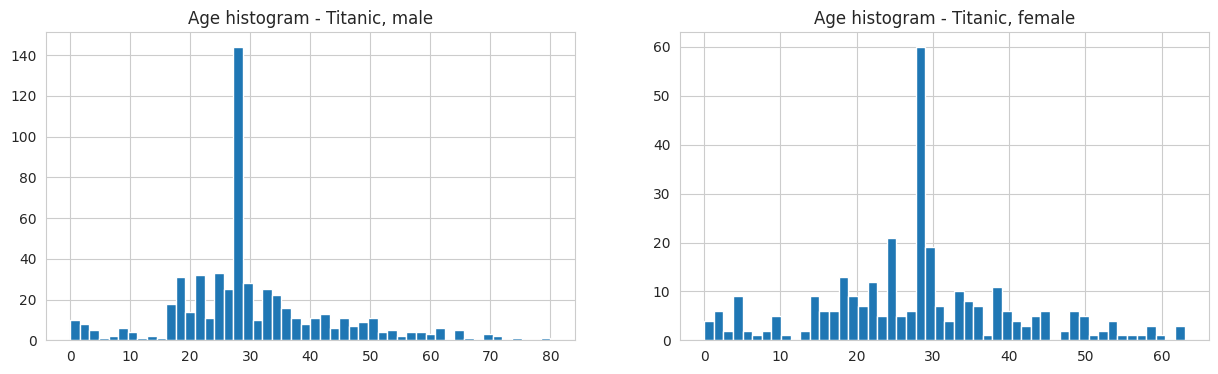

In [48]:
gender_titanic1 = titanic_dataframe[titanic_dataframe.Sex == "male"]
gender_titanic2 = titanic_dataframe[titanic_dataframe.Sex == "female"]

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 4))

axis1.set_title('Age histogram - Titanic, male')
axis2.set_title('Age histogram - Titanic, female')

gender_titanic1["Age"].hist(ax = axis1, bins = 50)
gender_titanic2["Age"].hist(ax = axis2, bins = 50)

#### task 2

In [49]:
titanic_dataframe.groupby("Pclass")

<Axes: title={'center': 'Age histogram - Titanic, Pclass 3'}>

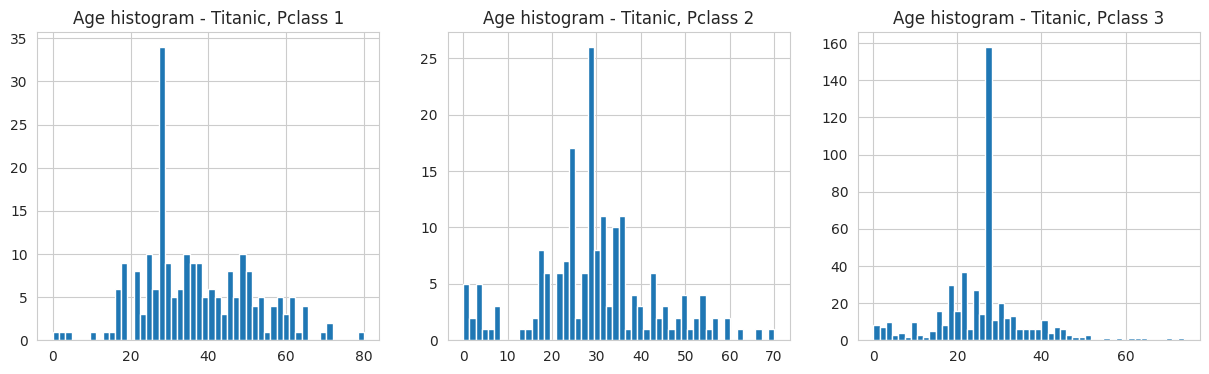

In [50]:
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(15, 4))
axis1.set_title('Age histogram - Titanic, Pclass 1')
axis2.set_title('Age histogram - Titanic, Pclass 2')
axis3.set_title('Age histogram - Titanic, Pclass 3')

pclass_titanic = titanic_dataframe[titanic_dataframe.Pclass == 1]
pclass_titanic["Age"].hist(ax = axis1, bins = 50)

pclass_titanic = titanic_dataframe[titanic_dataframe.Pclass == 2]
pclass_titanic["Age"].hist(ax = axis2, bins = 50)

pclass_titanic = titanic_dataframe[titanic_dataframe.Pclass == 3]
pclass_titanic["Age"].hist(ax = axis3, bins = 50)

## It's time for Machine learning!

![MLearning](https://media.giphy.com/media/BdrSy2gqURFEk/giphy.gif)

In [51]:
# machine learning tools: various methods from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [52]:
titanic_dataframe.head()

,Survived,Pclass,Sex,Age,Fare,C,Q,Class_1,Class_2,Family,Child,Female
PassengerId,,,,,,,,,,,,
1,0,3,male,22,7,False,False,False,False,1,False,False
2,1,1,female,38,71,True,False,True,False,1,False,True
3,1,3,female,26,7,False,False,False,False,0,False,True
4,1,1,female,35,53,False,False,True,False,1,False,True
5,0,3,male,35,8,False,False,False,False,0,False,False


In [53]:
titanic_dataframe.drop('Sex', axis=1, inplace=True)

In [54]:
titanic_dataframe.head()

,Survived,Pclass,Age,Fare,C,Q,Class_1,Class_2,Family,Child,Female
PassengerId,,,,,,,,,,,
1,0,3,22,7,False,False,False,False,1,False,False
2,1,1,38,71,True,False,True,False,1,False,True
3,1,3,26,7,False,False,False,False,0,False,True
4,1,1,35,53,False,False,True,False,1,False,True
5,0,3,35,8,False,False,False,False,0,False,False


In [55]:
train, test = train_test_split(titanic_dataframe, train_size=0.5, test_size=0.5)

In [56]:
train_x = train.drop(['Survived'], axis=1)
train_y = train['Survived']
test_x = test.drop(['Survived'], axis=1)
test_y = test['Survived']

In [57]:
# Logistic Regression

logistic_regression_model = LogisticRegression(solver='liblinear')
logistic_regression_model.fit(train_x, train_y)
train_prediction = logistic_regression_model.predict(train_x)
test_prediction = logistic_regression_model.predict(test_x)
train_accuracy = accuracy_score(train_y, train_prediction)
test_accuracy = accuracy_score(test_y, test_prediction)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.7865168539325843
Test Accuracy: 0.827354260089686


In [58]:
# get Correlation Coefficient for each feature using Logistic Regression
coeff_df = DataFrame(titanic_dataframe.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(logistic_regression_model.coef_[0])

# preview
coeff_df

,Features,Coefficient Estimate
0,Pclass,-0.733424
1,Age,-0.013515
2,Fare,-0.000257
3,C,0.640722
4,Q,0.299802
5,Class_1,0.442668
6,Class_2,0.496293
7,Family,0.111931
8,Child,1.873386
9,Female,2.415845


In [59]:
# Support Vector Machines

svm_model = SVC(C=1.0, gamma=0.5)
svm_model.fit(train_x, train_y)
train_prediction = svm_model.predict(train_x)
test_prediction = svm_model.predict(test_x)
train_accuracy = accuracy_score(train_y, train_prediction)
test_accuracy = accuracy_score(test_y, test_prediction)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.950561797752809
Test Accuracy: 0.6659192825112108


In [60]:
# Random Forests

random_forest_model = RandomForestClassifier(n_estimators=10)
random_forest_model.fit(train_x, train_y)
train_prediction = random_forest_model.predict(train_x)
test_prediction = random_forest_model.predict(test_x)
train_accuracy = accuracy_score(train_y, train_prediction)
test_accuracy = accuracy_score(test_y, test_prediction)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.9640449438202248
Test Accuracy: 0.8071748878923767


In [61]:
# K nearest neighbours

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(train_x, train_y)
train_prediction = knn_model.predict(train_x)
test_prediction = knn_model.predict(test_x)
train_accuracy = accuracy_score(train_y, train_prediction)
test_accuracy = accuracy_score(test_y, test_prediction)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.9595505617977528
Test Accuracy: 0.6860986547085202


### Task 3

Explore **sklearn** and find the best classifier!